# Compare K-Means and K-Center on Simulated Data

In [1]:
import random
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(cmap.N)]

mpl.rcParams["font.size"] = 24
mpl.rcParams["lines.linewidth"] = 2

seed = 0
random.seed(seed)
np.random.seed(seed)

markersize = 50

## Simulate Outliers

In [2]:
centers = np.array([[0, 0], [np.sin(np.pi/3), np.cos(np.pi/3)], [np.sin(np.pi/3*2), np.cos(np.pi/3*2)], \
    [np.sin(np.pi/3*3), np.cos(np.pi/3*3)], [np.sin(np.pi/3*4), np.cos(np.pi/3*4)],
    [np.sin(np.pi/3*5), np.cos(np.pi/3*5)]])*3
n_samples = [300, 4, 4, 4, 4, 4]
samples = None
for center, n in zip(centers, n_samples):
    cov = [[0.1, 0], [0, 0.1]]
    s = np.random.multivariate_normal(center, cov, n)
    if samples is None:
        samples = s
    else:
        samples = np.vstack([samples, s])

(np.float64(-3.172265148537022),
 np.float64(3.0733223233455673),
 np.float64(-3.7468851481628227),
 np.float64(2.2003839005377284))

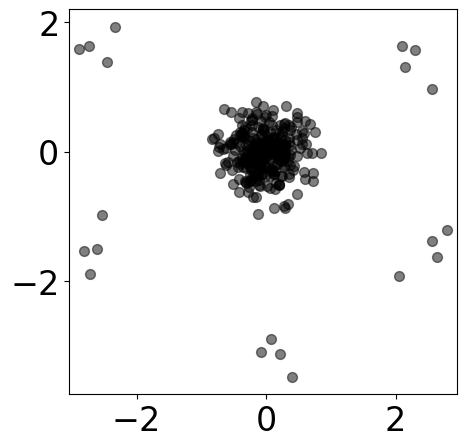

In [3]:
plt.figure(figsize=(5, 5))
plt.scatter(samples[:, 0], samples[:, 1], s=markersize, color="k", alpha=0.5)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# plt.axis("off")
plt.axis("equal")

## K-Means Results

(np.float64(-3.172265148537022),
 np.float64(3.0733223233455673),
 np.float64(-3.7468851481628227),
 np.float64(2.2003839005377284))

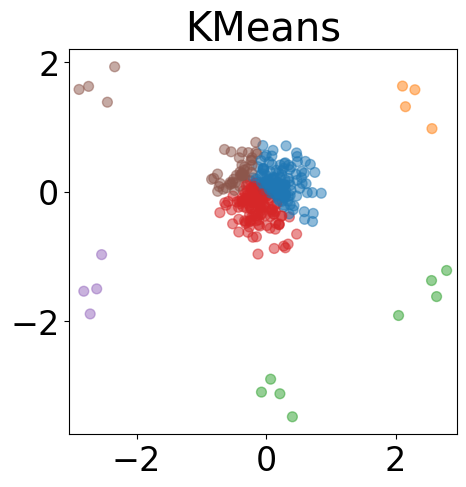

In [4]:
from sklearn.cluster import k_means
k = 6
centroid, labels, inertia = k_means(samples, n_clusters=k,
                                    init=samples[:k, :])

plt.figure(figsize=(5, 5))
plt.scatter(samples[:, 0], samples[:, 1], s=markersize,
            color=[colors[l] for l in labels], alpha=0.5)

plt.title("KMeans")
plt.axis("equal")

## K-Center Results

In [5]:
def k_center(points, k):
    losses = []
    n_points = points.shape[0]
    centers = []
    distances = np.full(n_points, np.inf)

    for j in range(0, k):
        if j == 0:
            centers = [0]

        for i in range(n_points):
            new_dist = np.linalg.norm(points[i]-points[centers[-1]])
            distances[i] = min(distances[i], new_dist)

        if j>=1:
            next_center = np.argmax(distances)
            centers.append(next_center)

        losses.append(np.max(distances))

    return centers, losses

In [6]:
k = 6
new_centers, losses = k_center(samples, k)
new_centers = samples[new_centers]

(np.float64(-3.172265148537022),
 np.float64(3.0733223233455673),
 np.float64(-3.7468851481628227),
 np.float64(2.2003839005377284))

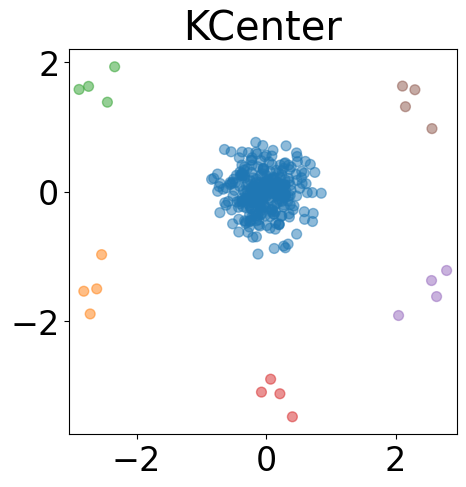

In [7]:
labels = [np.argmin(np.sum((samples[i, :]-new_centers)**2, axis=1)) for i in range(samples.shape[0])]
plt.figure(figsize=(5, 5))
plt.scatter(samples[:, 0], samples[:, 1],
            s=markersize, color=[colors[l] for l in labels], alpha=0.5)

plt.title("KCenter")
plt.axis("equal")